# Curso de Capacitación en Python para Data Science - Sesión 4

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>



BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 4: Reglas de asociación de datos en Python para una campaña de marketing navideño.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio4_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

# Desafío de la semana <font color=red> (20 puntos) </font>

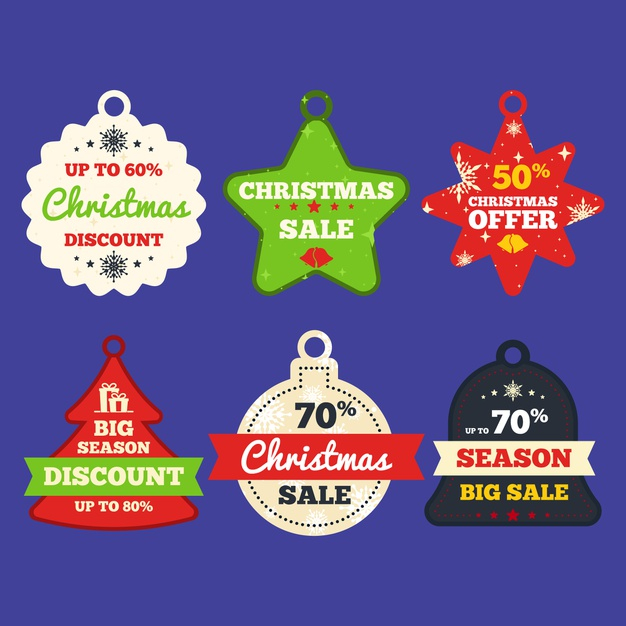

En época de fiestas navideñas, es usual que las personas vayan a comprar en frecuencia y montos más de los usuales. Esto puede ser aprovechado inteligentemente por las empresas, al presentarles ofertas y promociones en productos que ellas saben que los clientes están más dispuestos a comprar. Específicamente, en relación a las promociones de llevar más de un producto a la vez con un descuento, o a determinar la disposición de los productos en una tienda, es útil poder tener una idea de cuáles productos tienen la mayor posibilidad de ser adquiridos a la vez.

En el desafío de hoy, vamos a elegir una pareja de productos que serán ofrecidos en una campaña publicitaria, para ser adquiridos juntos en un mismo paquete.

> Si tuvieras que hacer tu lista de compras para navidad, que pondrías? Asumiendo que puedes tener gratis todo lo que pongas ahí. Considera que algunas cosas que compres, pueden también necesitar de otras de la lista.

Se ha realizado una pequeña encuesta, con la que se obtuvo la información para el presente dataset.

## PARTE 1: Extracción de reglas de asociación

En ese notebook vamos a extraer reglas de asociación en Python. Para ello, utilizaremos el algoritmo Apriori implementado en la libreria <b>apyori</b>.

In [1]:
# instala libreria apyori
# %pip install apyori==1.1.2  # Ejecutar en Notebook (Jupyter o Google Colab) / Anaconda Prompt

In [2]:
# Importa librerias importantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

### Carga los datos

In [3]:
# carga el archivo con los datos
filename = "https://github.com/DanielSaromo/Courses_DataFiles/blob/main/P4DS_CETAM/whishlist_navidad.csv?raw=true"
customerWhishes_data = pd.read_csv(filename, header=None)
customerWhishes_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Smartphone,Laptop,Mouse,Teclado,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Juego de mesa,Panetón,Chocolate para taza,...,Pavo,Vino / champagne / otras bebidas,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas
1,Juego de mesa,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Duraznos en almíbar,Vino / champagne / otras bebidas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smartphone,Laptop,Mouse,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Luces de navidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cada fila del dataset es una transaccion semanal de un cliente. Las columnas indican los items comprados en la transaccion (una columna no tiene necesariamente el mismo item). Valores NaN son valores nulos (colocados de relleno al importar los datos.  

### Convertir los datos a una lista de listas:

In [4]:
# prepara la data en la forma de lista de lista . Cada lista transaccion es una lista interna
records = []
for i in range(len(customerWhishes_data)):
    transaction = []
    for j in range(len(customerWhishes_data.columns)):
        if  pd.isnull(customerWhishes_data.values[i,j]) == False:  # if el item [i,j] no es  NaN
            transaction.append( customerWhishes_data.values[i,j] )
    records.append(transaction)

In [5]:
records

[['Smartphone',
  ' Laptop',
  ' Mouse',
  ' Teclado',
  ' Carro a control remoto (sin pilas)',
  ' Radio musical a pilas (sin pilas)',
  ' Pilas / baterías',
  ' Juego de mesa',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Duraznos en almíbar',
  ' Pavo',
  ' Vino / champagne / otras bebidas',
  ' Cubo de rubik',
  ' Árbol de navidad',
  ' Nacimiento navideño',
  ' Luces de navidad',
  ' Harina',
  ' Mantequilla',
  ' Huevo',
  ' Molde para galletas'],
 ['Juego de mesa',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Duraznos en almíbar',
  ' Vino / champagne / otras bebidas'],
 ['Smartphone',
  ' Laptop',
  ' Mouse',
  ' Carro a control remoto (sin pilas)',
  ' Radio musical a pilas (sin pilas)',
  ' Pilas / baterías',
  ' Panetón',
  ' Chocolate para taza',
  ' Leche',
  ' Cocoa',
  ' Azúcar',
  ' Árbol de navidad',
  ' Nacimiento navideño',
  ' Luces de navidad'],
 ['Radio musical a pilas (sin pilas)',
  ' Pilas 

### Exploremos los datos para ver la frecuencia de aparición de los productos

In [6]:
customerWhishes_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Smartphone,Laptop,Mouse,Teclado,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Juego de mesa,Panetón,Chocolate para taza,...,Pavo,Vino / champagne / otras bebidas,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas
1,Juego de mesa,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Duraznos en almíbar,Vino / champagne / otras bebidas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smartphone,Laptop,Mouse,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Radio musical a pilas (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Nacimiento navideño,Luces de navidad,Harina,Mantequilla,Huevo,Molde para galletas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Panetón,Chocolate para taza,Leche,Cocoa,Azúcar,Luces de navidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Carro a control remoto (sin pilas),Pilas / baterías,Panetón,Chocolate para taza,Leche,Cubo de rubik,Árbol de navidad,Nacimiento navideño,Luces de navidad,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Smartphone,Carro a control remoto (sin pilas),Radio musical a pilas (sin pilas),Pilas / baterías,Harina,Mantequilla,Huevo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Laptop,Mouse,Teclado,Panetón,Chocolate para taza,Leche,Árbol de navidad,Luces de navidad,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Smartphone,Laptop,Mouse,Panetón,Chocolate para taza,Pavo,Vino / champagne / otras bebidas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Smartphone,Laptop,Pilas / baterías,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Poner todas las transacciones en una sola lista
txns=customerWhishes_data.values.reshape(-1).tolist()
txns

['Smartphone',
 ' Laptop',
 ' Mouse',
 ' Teclado',
 ' Carro a control remoto (sin pilas)',
 ' Radio musical a pilas (sin pilas)',
 ' Pilas / baterías',
 ' Juego de mesa',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Duraznos en almíbar',
 ' Pavo',
 ' Vino / champagne / otras bebidas',
 ' Cubo de rubik',
 ' Árbol de navidad',
 ' Nacimiento navideño',
 ' Luces de navidad',
 ' Harina',
 ' Mantequilla',
 ' Huevo',
 ' Molde para galletas',
 'Juego de mesa',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Duraznos en almíbar',
 ' Vino / champagne / otras bebidas',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Smartphone',
 ' Laptop',
 ' Mouse',
 ' Carro a control remoto (sin pilas)',
 ' Radio musical a pilas (sin pilas)',
 ' Pilas / baterías',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Árbol de navidad',
 ' Nacimiento navideño',
 ' Luces de navidad',
 n

In [8]:
# Convertir todos los valores de la lista a cadenas
txns=[str(x) for x in txns]
txns

['Smartphone',
 ' Laptop',
 ' Mouse',
 ' Teclado',
 ' Carro a control remoto (sin pilas)',
 ' Radio musical a pilas (sin pilas)',
 ' Pilas / baterías',
 ' Juego de mesa',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Duraznos en almíbar',
 ' Pavo',
 ' Vino / champagne / otras bebidas',
 ' Cubo de rubik',
 ' Árbol de navidad',
 ' Nacimiento navideño',
 ' Luces de navidad',
 ' Harina',
 ' Mantequilla',
 ' Huevo',
 ' Molde para galletas',
 'Juego de mesa',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Duraznos en almíbar',
 ' Vino / champagne / otras bebidas',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Smartphone',
 ' Laptop',
 ' Mouse',
 ' Carro a control remoto (sin pilas)',
 ' Radio musical a pilas (sin pilas)',
 ' Pilas / baterías',
 ' Panetón',
 ' Chocolate para taza',
 ' Leche',
 ' Cocoa',
 ' Azúcar',
 ' Árbol de navidad',
 ' Nacimiento nav

In [9]:
# Eliminar NaN de la lista
newtxns=[x for x in txns if x != 'nan']

# Eliminar espacios en blanco iniciales y finales
for i in range(len(newtxns)):
    newtxns[i]=newtxns[i].strip()
    
newtxns

['Smartphone',
 'Laptop',
 'Mouse',
 'Teclado',
 'Carro a control remoto (sin pilas)',
 'Radio musical a pilas (sin pilas)',
 'Pilas / baterías',
 'Juego de mesa',
 'Panetón',
 'Chocolate para taza',
 'Leche',
 'Cocoa',
 'Azúcar',
 'Duraznos en almíbar',
 'Pavo',
 'Vino / champagne / otras bebidas',
 'Cubo de rubik',
 'Árbol de navidad',
 'Nacimiento navideño',
 'Luces de navidad',
 'Harina',
 'Mantequilla',
 'Huevo',
 'Molde para galletas',
 'Juego de mesa',
 'Panetón',
 'Chocolate para taza',
 'Leche',
 'Cocoa',
 'Azúcar',
 'Duraznos en almíbar',
 'Vino / champagne / otras bebidas',
 'Smartphone',
 'Laptop',
 'Mouse',
 'Carro a control remoto (sin pilas)',
 'Radio musical a pilas (sin pilas)',
 'Pilas / baterías',
 'Panetón',
 'Chocolate para taza',
 'Leche',
 'Cocoa',
 'Azúcar',
 'Árbol de navidad',
 'Nacimiento navideño',
 'Luces de navidad',
 'Radio musical a pilas (sin pilas)',
 'Pilas / baterías',
 'Panetón',
 'Chocolate para taza',
 'Nacimiento navideño',
 'Luces de navidad',
 

In [10]:
# Cree un marco de datos usando esta lista única y agregue una columna para contar
df_list=pd.DataFrame(newtxns)
df_list['Count']=1

# Show dataframe
df_list

,0,Count
0,Smartphone,1
1,Laptop,1
2,Mouse,1
3,Teclado,1
4,Carro a control remoto (sin pilas),1
...,...,...
120,Pilas / baterías,1
121,Cubo de rubik,1
122,Carro a control remoto (sin pilas),1
123,Pilas / baterías,1


In [11]:
# Agrupar por elementos y cambiar el nombre de las columnas
df_list=df_list.groupby(by=[0], as_index=False).sum().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage']=(df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0:'Item'})
df_list=df_list.sort_values(by=['Count'], ascending=False)

# Show dataframe
df_list

,Item,Count,Percentage
18,Pilas / baterías,14,0.112
1,Carro a control remoto (sin pilas),10,0.080
2,Chocolate para taza,10,0.080
16,Panetón,10,0.080
11,Luces de navidad,6,0.048
10,Leche,6,0.048
19,Radio musical a pilas (sin pilas),6,0.048
20,Smartphone,5,0.040
4,Cubo de rubik,5,0.040
9,Laptop,5,0.040


### 1) Extraer un subdataframe con los 10 productos que más aparecen en la selección de los usuarios: <font color='red'>3 puntos</font>

In [12]:
# COMPLETAR CÓDIGO
df_top = df_list.head(10)
df_top

,Item,Count,Percentage
18,Pilas / baterías,14,0.112
1,Carro a control remoto (sin pilas),10,0.080
2,Chocolate para taza,10,0.080
16,Panetón,10,0.080
11,Luces de navidad,6,0.048
10,Leche,6,0.048
19,Radio musical a pilas (sin pilas),6,0.048
20,Smartphone,5,0.040
4,Cubo de rubik,5,0.040
9,Laptop,5,0.040


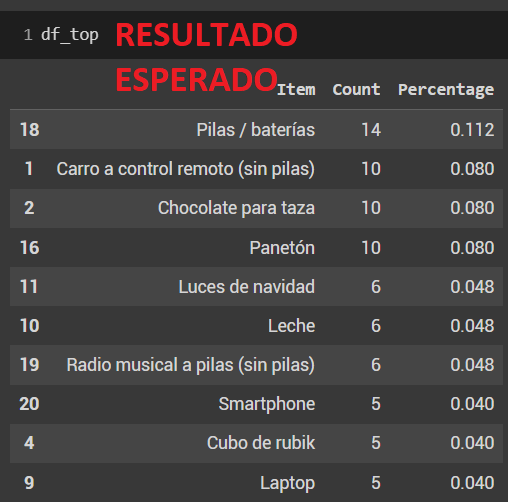

### 2) Calcular la cantidad total de productos presentes en la lista completa: <font color='red'>3 punto</font>

Calculemos la cantidad de productos totales EN LA LISTA COMPLETA (considerando que un producto repetido se debe contar cada una de dichas veces en las que se repite):

In [13]:
len(newtxns)

125

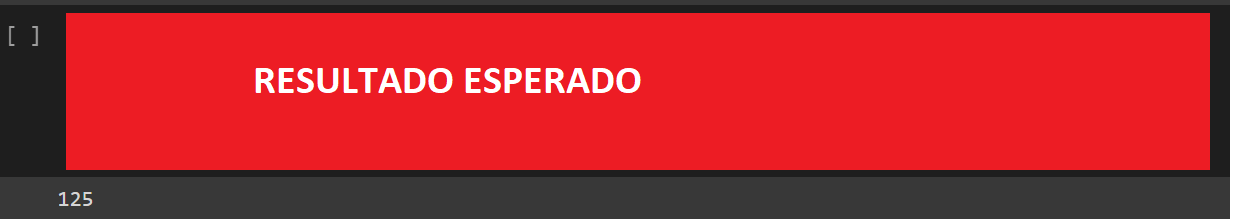

### 3) Generar un diagrama de barras horizontales que muestre el PORCENTAJE de aparición (frecuencia relativa) de los 10 productos más seleccionados por los usuarios: <font color='red'>3 puntos</font>

Puede utilizar la siguiente función: `plt.barh(...)`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

Por ejemplo, si hubieran en total 40 selecciones de productos, y el producto `'Azúcar'` fue seleccionado 4 veces, tendría una frecuencia relativa expresada en un porcentaje de 10%.


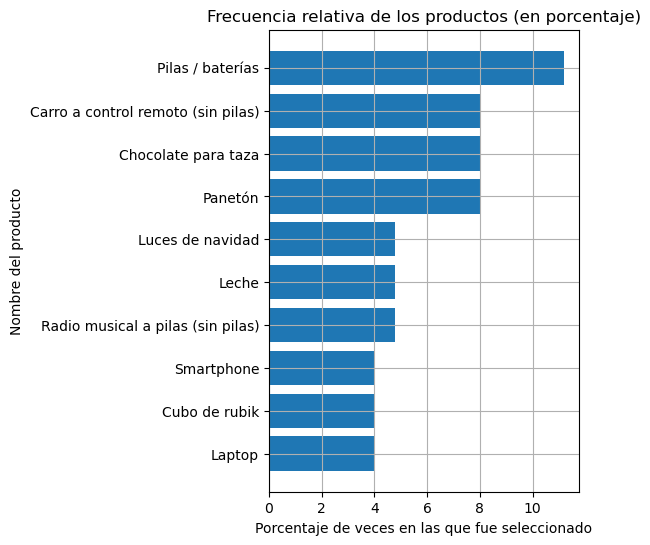

In [14]:
# Dibujar un gráfico de barras horizontales
plt.figure(figsize=(4,6))
plt.ylabel('Nombre del producto')
plt.xlabel('Porcentaje de veces en las que fue seleccionado')
plt.title("Frecuencia relativa de los productos (en porcentaje)")
plt.barh(df_top['Item'], df_top['Percentage']*100, height=0.8)
plt.grid() # para mostrar la grilla
plt.gca().invert_yaxis() # para invertir el orden de aparición de los elementos en el eje Y
plt.show()

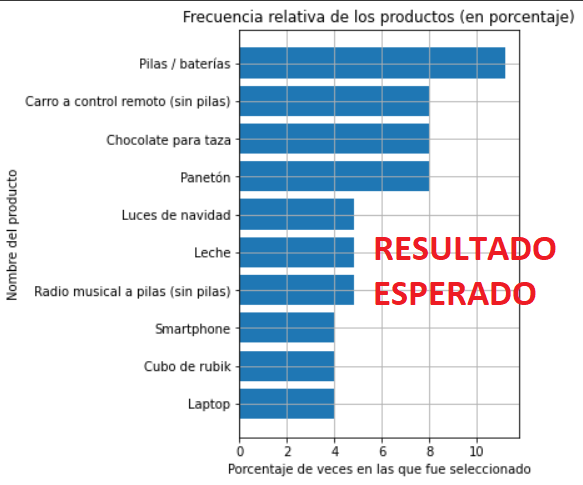

In [15]:
# import sys
# sys.exit("Detener la ejecución en esta celda")

---


### Aplica el algoritmo Apriori  para extraer las reglas de asociacion



In [16]:
# min_support: Soporte mínimo requerido para una regla de asociación es del 20%
# min_confidence: Confianza mínima requerida para una regla de asociación es del 70%
# min_lift: Lift con al menos 3 veces más probabilidades de ocurrencia conjunta de lo que se esperaría si los elementos fueran independientes

association_rules = apriori(records, min_support=0.2, min_confidence=0.7, min_lift=3, max_length=3)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)]),
 RelationRecord(items=frozenset({' Leche', ' Azúcar'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Leche', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Laptop', 'Smartphone'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Laptop'}), items_add=frozenset({'Smartphone'}), confidence=1.0, lift=3.5999999999999996

In [17]:
# imprime la cantidad de reglas encontradas
print(len(association_results))

15


In [18]:
# imprime la primera regla
print(association_results[0])

RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)])


### 4) Aplicar el algoritmo Apriori para extraer las reglas de asociacion de 2 elementos, con los hiperparámetros `min_support`, `min_confidence`, y `min_lift` mostrados a continuación: <font color='red'>3 puntos</font>

Se solicitan reglas compuestas únicamente por 2 elementos.

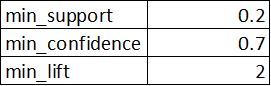

In [19]:
association_rules = apriori(records, min_support=0.2, min_confidence=0.7, min_lift=2, max_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)]),
 RelationRecord(items=frozenset({' Leche', ' Azúcar'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Leche', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)]),
 RelationRecord(items=frozenset({' Cubo de rubik', 'Carro a control remoto (sin pilas)'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Cubo de rubik'}), items_add=frozenset({'Carro a control 

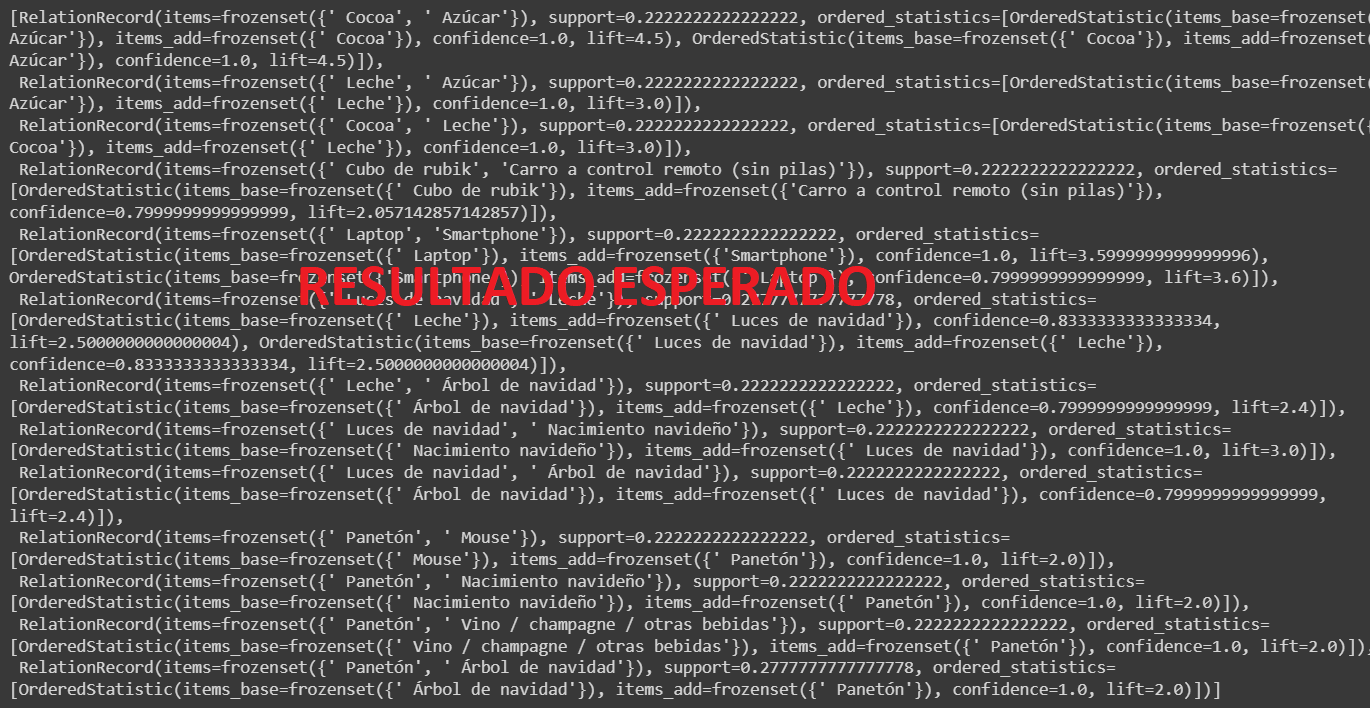

### 5) Imprimir la cantidad de reglas de asociación mostrada en el paso anterior: <font color='red'>2 puntos</font>

In [20]:
len(association_results)

13

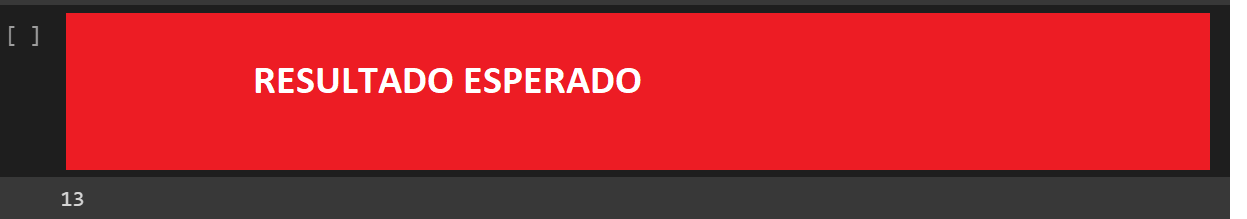

### Con los resultados de la ejecución del algoritmo, crear un dataframe con las columnas: ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift']:

In [21]:
association_results[0]

RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)])

In [22]:
# Debug
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print('item ---->', item)
    print('item[0] ---->', item[0])
    print('item[1] ---->', item[1])
    print('item[2][0][2] ---->', item[2][0][2])
    print('item[2][0][3] ---->', item[2][0][3])
    print('items ---->', items)
    print("---")

item ----> RelationRecord(items=frozenset({' Azúcar', ' Cocoa'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Cocoa'}), confidence=1.0, lift=4.5), OrderedStatistic(items_base=frozenset({' Cocoa'}), items_add=frozenset({' Azúcar'}), confidence=1.0, lift=4.5)])
item[0] ----> frozenset({' Azúcar', ' Cocoa'})
item[1] ----> 0.2222222222222222
item[2][0][2] ----> 1.0
item[2][0][3] ----> 4.5
items ----> [' Azúcar', ' Cocoa']
---
item ----> RelationRecord(items=frozenset({' Leche', ' Azúcar'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({' Azúcar'}), items_add=frozenset({' Leche'}), confidence=1.0, lift=3.0)])
item[0] ----> frozenset({' Leche', ' Azúcar'})
item[1] ----> 0.2222222222222222
item[2][0][2] ----> 1.0
item[2][0][3] ----> 3.0
items ----> [' Leche', ' Azúcar']
---
item ----> RelationRecord(items=frozenset({' Leche', ' Cocoa'}), support=0.2222222222222222, ordered_s

In [23]:
# Por cada regla

lista_conColumnasOrdenadas = []

for item in association_results:

    # Primer elemento de la regla contiene el par [items base, item añadido]
    pair = item[0]
    items = [x for x in pair]
    print("Regla: {}  ->  {}".format( items[:-1],  items[-1] ) ) # imprime items base (todos menos el ultimo en un array) y item añadido (el ultimo de items)

    # Segundo elemento de la regla es el soporte
    print("Soporte: " + str(item[1]))

    # Tercer elemento de la regla es son estadisticas (Confianza, Lift)
    print("Confianza: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

    whishes_thisCustomer = [items[:-1][0],  items[-1], item[1], item[2][0][2], item[2][0][3]] # Antecedentes, Consecuentes, Soporte, Confianza y Lift
    lista_conColumnasOrdenadas.append([str(val) for val in whishes_thisCustomer]) # convertir a str los elementos de la lista

Regla: [' Azúcar']  ->   Cocoa
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 4.5
Regla: [' Leche']  ->   Azúcar
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: [' Leche']  ->   Cocoa
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: [' Cubo de rubik']  ->  Carro a control remoto (sin pilas)
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.057142857142857
Regla: [' Laptop']  ->  Smartphone
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.5999999999999996
Regla: [' Leche']  ->   Luces de navidad
Soporte: 0.2777777777777778
Confianza: 0.8333333333333334
Lift: 2.5000000000000004
Regla: [' Leche']  ->   Árbol de navidad
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.4
Regla: [' Nacimiento navideño']  ->   Luces de navidad
Soporte: 0.2222222222222222
Confianza: 1.0
Lift: 3.0
Regla: [' Árbol de navidad']  ->   Luces de navidad
Soporte: 0.2222222222222222
Confianza: 0.7999999999999999
Lift: 2.4
Regla: [' Panetón']  ->   Mouse
Sopor

#### Generamos un dataframe

In [24]:
lista_conColumnasOrdenadas

[[' Azúcar', ' Cocoa', '0.2222222222222222', '1.0', '4.5'],
 [' Leche', ' Azúcar', '0.2222222222222222', '1.0', '3.0'],
 [' Leche', ' Cocoa', '0.2222222222222222', '1.0', '3.0'],
 [' Cubo de rubik',
  'Carro a control remoto (sin pilas)',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.057142857142857'],
 [' Laptop', 'Smartphone', '0.2222222222222222', '1.0', '3.5999999999999996'],
 [' Leche',
  ' Luces de navidad',
  '0.2777777777777778',
  '0.8333333333333334',
  '2.5000000000000004'],
 [' Leche',
  ' Árbol de navidad',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.4'],
 [' Nacimiento navideño',
  ' Luces de navidad',
  '0.2222222222222222',
  '1.0',
  '3.0'],
 [' Árbol de navidad',
  ' Luces de navidad',
  '0.2222222222222222',
  '0.7999999999999999',
  '2.4'],
 [' Panetón', ' Mouse', '0.2222222222222222', '1.0', '2.0'],
 [' Panetón', ' Nacimiento navideño', '0.2222222222222222', '1.0', '2.0'],
 [' Panetón',
  ' Vino / champagne / otras bebidas',
  '0.2222222222222222',


In [25]:
output_asDataFrame = pd.DataFrame((lista_conColumnasOrdenadas), columns = ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])

In [26]:
output_asDataFrame

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
1,Leche,Azúcar,0.2222222222222222,1.0,3.0
2,Leche,Cocoa,0.2222222222222222,1.0,3.0
3,Cubo de rubik,Carro a control remoto (sin pilas),0.2222222222222222,0.7999999999999999,2.057142857142857
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
5,Leche,Luces de navidad,0.2777777777777778,0.8333333333333334,2.5000000000000004
6,Leche,Árbol de navidad,0.2222222222222222,0.7999999999999999,2.4
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
8,Árbol de navidad,Luces de navidad,0.2222222222222222,0.7999999999999999,2.4
9,Panetón,Mouse,0.2222222222222222,1.0,2.0


Hasta este punto, hemos obtenido un DataFrame con las reglas de asociación que involucran únicamente dos productos.

---

## PARTE 2: Empleo de las reglas de asociación para seleccionar una pareja de productos para la campaña de marketing

Veamos la siguiente promoción de una conocida tienda italiana que vende productos electrónicos:

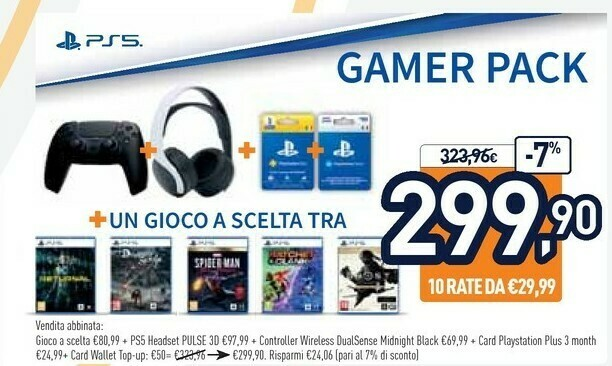

Observamos que hay una oferta al comprar los siguientes productos juntos: controlador (joystick), audífonos gamer, dos cartas regalo para PS5 (una dorada y una plateada), y un juego para PS5 (a ser elegido de la lista de opciones mostrada).

¿Cómo elegir la lista de productos que, en base a nuestros datos, tenga una mayor probabilidad de ser adquirida por nuestros clientes?

Usando las reglas de asociación obtenidas en la parte 1 del presente desafío, y aplicando la teoría vista en clase, vamos a seleccionar la pareja de productos para nuestra oferta por campaña navideña.

### Ordenamiento múltiple de columnas en pandas

Vamos a profundizar un poco en cómo ordenar columnas en pandas.

In [27]:
import pandas as pd
technologies = ({
    'Cursos'    : ["Spark","Hadoop","Pandas","Oracle","Java","Numpy"],
    'Tarifa'    : [20000,25000,25000,22000,20000,20000],
    'Duración'  : ['30days','35days','40days','50days','60days','10days'],
    'Descuento' : [1000,2300,1500,1200,4000,3000]
               })
df = pd.DataFrame(technologies, index = ['r1','r2','r3','r4','r0','r05'])
df

,Cursos,Tarifa,Duración,Descuento
r1,Spark,20000,30days,1000
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


Vamos a ordenar de acuerdo a la columna `Fee`, de forma DEcreciente:

In [28]:
df2 = df.sort_values(by='Tarifa', ascending=False)
df2

,Cursos,Tarifa,Duración,Descuento
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


In [29]:
# Esta es una forma alternativa exactamente equivalente, pero más generalizable:
df2 = df.sort_values(by=['Tarifa'], ascending=[False])
df2

,Cursos,Tarifa,Duración,Descuento
r2,Hadoop,25000,35days,2300
r3,Pandas,25000,40days,1500
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r0,Java,20000,60days,4000
r05,Numpy,20000,10days,3000


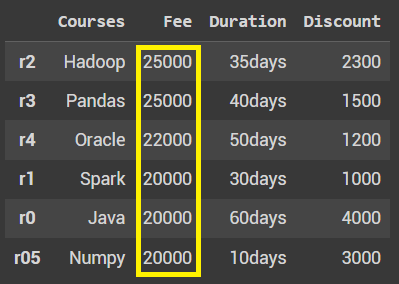

Ahora, vamos a ordenar primero decrecientemente respecto a la columna `Fee`, y luego crecientemente respecto a la columna `Discount`.

In [30]:
df3 = df.sort_values(by=['Tarifa', 'Descuento'], ascending=[False, True])
df3

,Cursos,Tarifa,Duración,Descuento
r3,Pandas,25000,40days,1500
r2,Hadoop,25000,35days,2300
r4,Oracle,22000,50days,1200
r1,Spark,20000,30days,1000
r05,Numpy,20000,10days,3000
r0,Java,20000,60days,4000


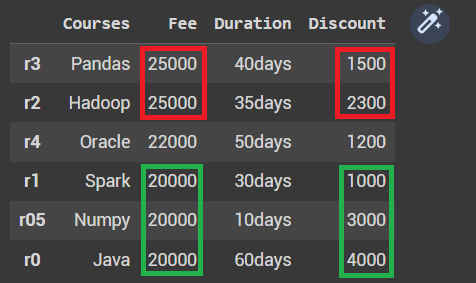

Códigos adaptados de: https://sparkbyexamples.com/pandas/pandas-sort-dataframe-by-multiple-columns/

### 6) Ordenar el dataframe creado en el paso anterior, de forma descendiente según sus valores de la columna (o columnas) que usted considere conveniente, para seleccionar una pareja de productos para proponer en una promoción navideña: <font color='red'>2 puntos</font>

*Notar que la cantidad de datos utilizados es pequeña, y asumimos que todos los participantes del formulario llenaron la encuesta "de buena fe" y no simplemente llenaron las casillas arbitrariamente.*

<font color=green> **Condiciones numéricas que deben cumplirse para la selección:**</font>


<font color=green> - Verificar que el valor de `'Lift'` sea mayor a 1.</font>

<font color=green> - Verificar que el valor de `'Confidence'` sea mayor a 0.7</font>

<font color=green> - Verificar que el valor de `'Support'` sea mayor a 0.2</font>

Es parte de la evaluación la selección de la columna para poder elegir la pareja de productos deseada.

Si desea, puede realizar más de un ordenamiento para poder encontrar la pareja de productos que va a seleccionar. Puede ordenar primero respecto a una columna, y en otra celda, ordenar respecto dos columnas. Indicar cuál es el ordenamiento final que usó para brindar su respuesta.

Debe imprimir el dataframe ordenado.

In [31]:
output_asDataFrame.head()

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
1,Leche,Azúcar,0.2222222222222222,1.0,3.0
2,Leche,Cocoa,0.2222222222222222,1.0,3.0
3,Cubo de rubik,Carro a control remoto (sin pilas),0.2222222222222222,0.7999999999999999,2.057142857142857
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996


In [32]:
output_asDataFrame.sort_values(by=['Lift', 'Support'], ascending=[False, False])

,Antecedents,Consequents,Support,Confidence,Lift
0,Azúcar,Cocoa,0.2222222222222222,1.0,4.5
4,Laptop,Smartphone,0.2222222222222222,1.0,3.5999999999999996
1,Leche,Azúcar,0.2222222222222222,1.0,3.0
2,Leche,Cocoa,0.2222222222222222,1.0,3.0
7,Nacimiento navideño,Luces de navidad,0.2222222222222222,1.0,3.0
5,Leche,Luces de navidad,0.2777777777777778,0.8333333333333334,2.5000000000000004
6,Leche,Árbol de navidad,0.2222222222222222,0.7999999999999999,2.4
8,Árbol de navidad,Luces de navidad,0.2222222222222222,0.7999999999999999,2.4
3,Cubo de rubik,Carro a control remoto (sin pilas),0.2222222222222222,0.7999999999999999,2.057142857142857
12,Panetón,Árbol de navidad,0.2777777777777778,1.0,2.0


### 7) Seleccionar una pareja de productos que se usarían en una promoción navideña (christmas bundle pack), según las condiciones dadas a continuación (vistas en la parte teórica): <font color='red'>2 puntos</font>

<font color=green> **Condiciones numéricas que deben cumplirse para la selección:**</font>


<font color=green> - Verificar que el valor de `'Lift'` sea mayor a 1.</font>

<font color=green> - Verificar que el valor de `'Confidence'` sea mayor a 0.7</font>

<font color=green> - Verificar que el valor de `'Support'` sea mayor a 0.2</font>

Debe COMPLETAR la siguiente celda de texto:

Aplicando ciencia de datos (específicamente, análisis de agrupamientos) para realizar una promoción navideña en la que se motive a los clientes a comprar dos productos juntos, se eligió la pareja de productos: `'Cocoa'` y `'Azúcar'`.

### 8) Justificar por qué eligió dicha columna o columnas para el ordenamiento, en su exploración de las reglas para seleccionar los productos que colocará en la oferta a proponer en base a su análisis: <font color='red'>2 puntos</font>

Debe mencionar como se relacionan dichas columnas, con la teoría vista en clase. También puede mencionar una interpretación intuitiva de la teoría, en base a los resultados obtenidos.

Justificar...

Elegi el "Lift" debido a que indica la fuerza de la asociación entre los productos, lo cual es fundamental para seleccionar los productos que se colocarán en la oferta. Una alta "Lift" sugiere una relación significativa entre los productos, lo que los hace candidatos ideales para una promoción conjunta. Es decir el "Lift" de 4.5 de los productos `Cocoa` y  `Azucar` significa que la probabilidad de que dos productos se compren juntos es 4.5 veces mayor que si fueran comprados de forma independiente.

Tambien elegi el "Soporte", ya que indica la frecuencia con la que aparece un conjunto de productos juntos en todas las transacciones. Un alto soporte sugiere que el conjunto de productos es común y puede ser relevante para las estrategias de promoción.